In [15]:
import pandas as pd

# Load the dataset
data = pd.read_excel('heart_disease.xlsx')
print(data.head())
print(data.info())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

## 2.Exploratory Data Analysis (EDA)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Check for missing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

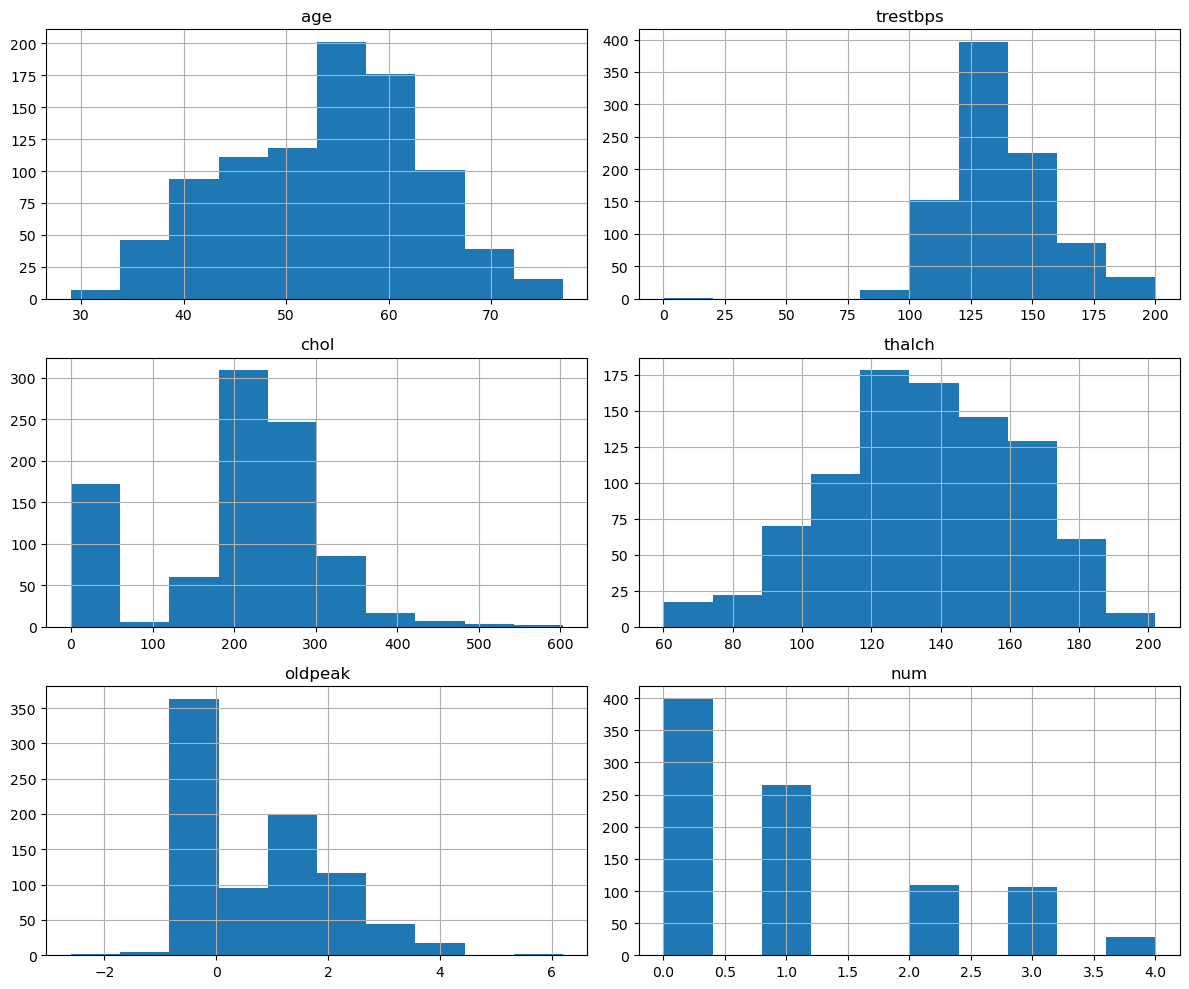

In [18]:
# Visualize distributions with histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

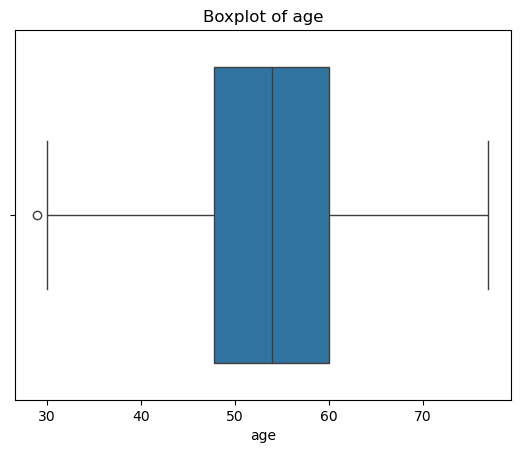

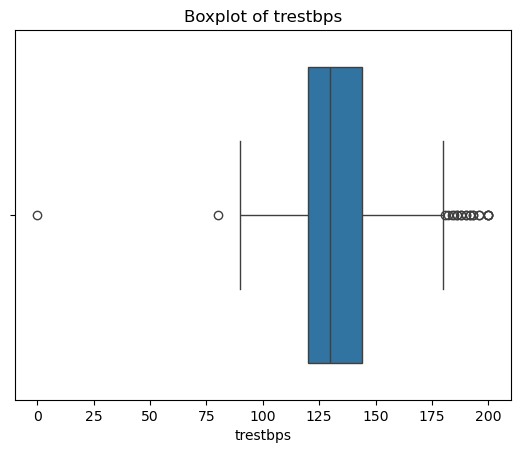

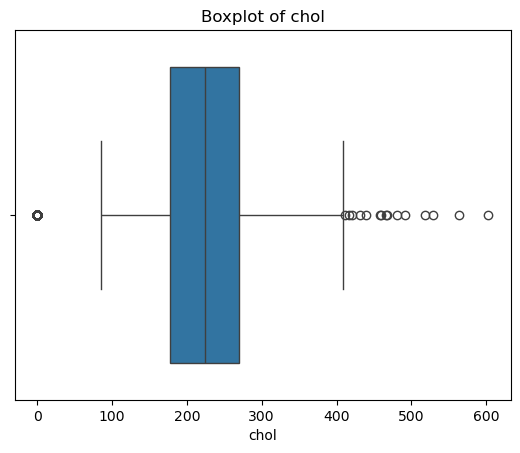

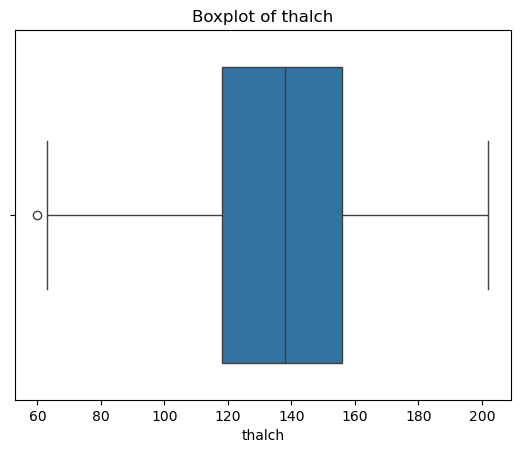

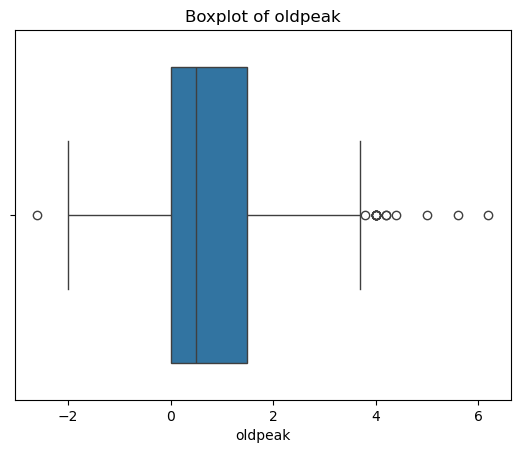

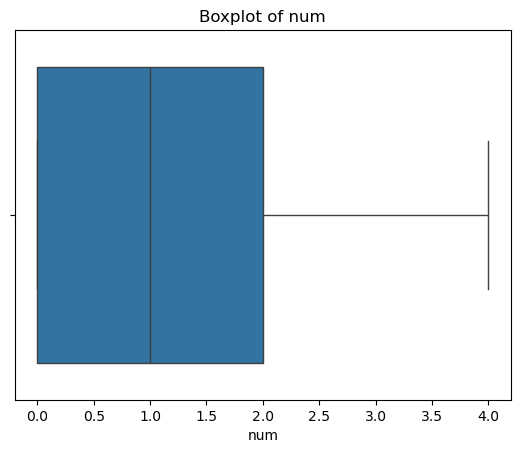

In [19]:
# Boxplots for outliers in numeric columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

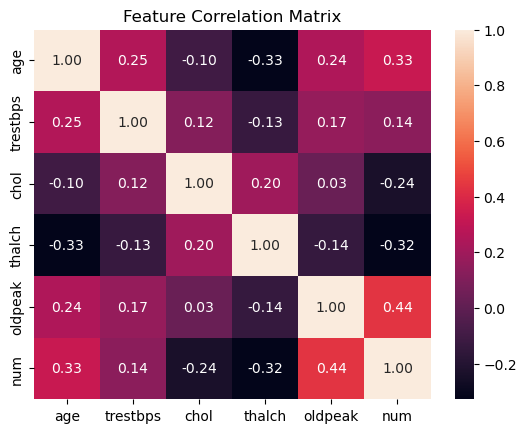

In [20]:
# Correlation matrix heatmap
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

## 3.Feature Engineering

In [21]:
if 'exang' in data.columns:
    # Change all entries in 'exang' column to strings first
    exang_str = data['exang'].astype(str)

    # Convert strings to uppercase to unify different cases
    exang_upper = exang_str.str.upper()

    # Define a dictionary to map recognized string values to integers
    value_map = {
        'TRUE': 1,
        'FALSE': 0,
        'TURE': 1,  # Correction for a common typo
        # Add other variants if found
    }

    # Replace values in the series using the dictionary, map unknown to 0
    exang_mapped = exang_upper.map(value_map).fillna(0).astype(int)

    # Assign the cleaned and converted series back to the dataframe
    data['exang'] = exang_mapped


In [22]:
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [23]:
data.fillna(data.median(), inplace=True)

## 4.Decision Tree Classification

In [24]:
X = data.drop('num', axis=1)
y = data['num']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        89
           1       0.38      0.42      0.40        48
           2       0.39      0.32      0.35        22
           3       0.20      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.50      0.52      0.51       182



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5164835164835165
Precision: 0.4981566361734969
Recall: 0.5164835164835165
F1 Score: 0.5063119071995472
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        89
           1       0.38      0.42      0.40        48
           2       0.39      0.32      0.35        22
           3       0.20      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.50      0.52      0.51       182



## 5.Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Train with best parameters
best_dtree = grid_search.best_estimator_
y_pred_best = best_dtree.predict(X_test)

print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best))
print("Classification report after tuning:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Accuracy after tuning: 0.5439560439560439
Classification report after tuning:
               precision    recall  f1-score   support

           0       0.72      0.82      0.76        89
           1       0.39      0.50      0.44        48
           2       0.00      0.00      0.00        22
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.24      0.29      0.26       182
weighted avg       0.46      0.54      0.50       182



## 6.Model Evaluation and Analysis

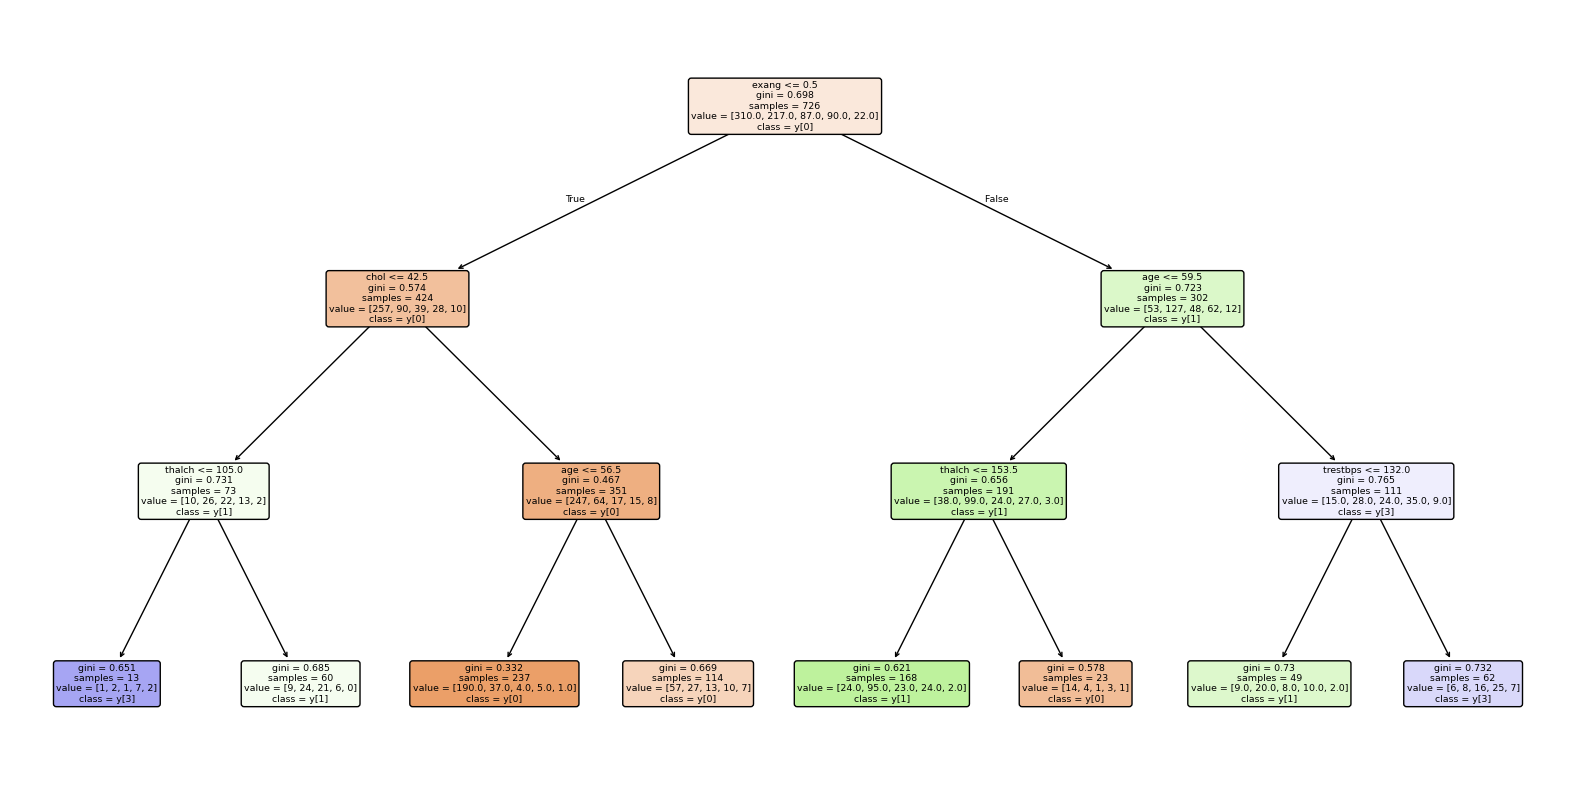

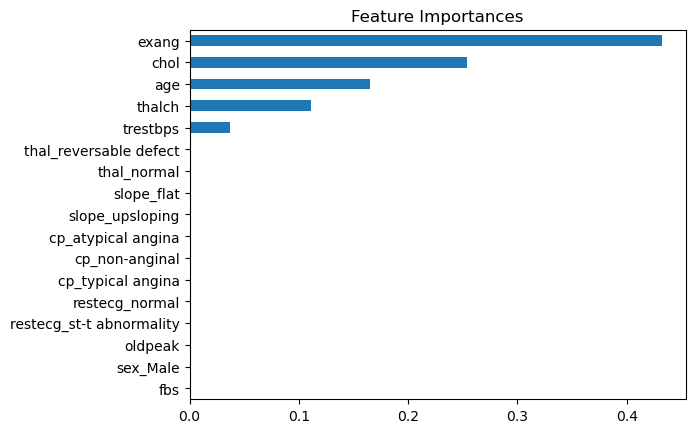

In [28]:
from sklearn.tree import plot_tree

# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtree, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

# Feature importance
feat_importances = pd.Series(best_dtree.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()


## Interview Questions:
#### 1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
max_depth: Controls the maximum depth of the tree. Smaller values prevent overfitting but can cause underfitting; larger values allow complex patterns but risk overfitting.

criterion: The function to measure the quality of a split, commonly "gini" (Gini impurity) or "entropy" (information gain). Different criteria can affect how splits are chosen and model accuracy.

min_samples_split: Minimum number of samples required to split a node. Higher values make the tree more general (less complex), reducing overfitting.

min_samples_leaf: Minimum number of samples at a leaf node. Increasing it smooths the model and reduces overfitting.

max_features: Number of features to consider when looking for the best split. Controls tree randomness and complexity.

splitter: Strategy to choose the split at each node ("best" or "random"). Random can reduce overfitting by introducing randomness.
#### 2.What is the difference between the Label encoding and One-hot encoding?
    Label Encoding: Assigns each category a unique integer label (e.g., Red=0, Green=1, Blue=2). Suitable for ordinal categories where order has meaning. However, it can inadvertently imply an ordinal relationship in nominal data, which may mislead some algorithms.

One-hot Encoding: Converts each category into a separate binary feature (column) where presence is marked as 1 and absence as 0. Appropriate for nominal categorical data with no order. Prevents algorithms from assuming any order among categories.